## Simulazione dell'esame di Metodi Numerici


## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [94]:
# prendo i dati di input 
from scipy.io import loadmat

import numpy as np

dati = loadmat('testI.mat')

A=dati["A"] 

A=A.astype(float)

b=dati["b"] 

b=b.astype(float)

In [95]:
def checkIfDescentIsPossible(A):
    # il teorema dice che risolvere il sistema Ax=b equivale a minimizzare la funzione quadratica per  
    # il calcolo del minimo perchè la soluzione del sistema coincide con il punto minimo della funzione.

    # check se la matrice A è quadrata
    if A.shape[0] != A.shape[1]:
        print("matrice non quadrata")
        return False
    flag = A==A.T
    if np.all(flag) != True:
        print("matrice non simmetrica")
        return False
    autoVal,AutoVet = np.linalg.eig(A)
    flag = autoVal >0
    if np.all(flag) != True:
        print("matrice non definita positiva")
        return False

    return True

print(checkIfDescentIsPossible(A))

True


In [96]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p =  -r
    it = 1
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore >= tol:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x+alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 1
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

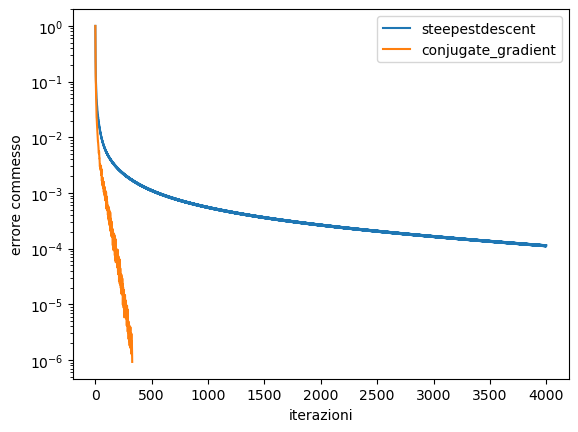

In [97]:
import matplotlib.pyplot as plt
tol=1e-6
itmax=4000
x0=np.zeros(A.shape[0]).reshape(A.shape[0],1)
x,vet_r,vec_sol,it = steepestdescent(A,b,x0,itmax,tol)
x2,vet_r2,vec_sol2,it2 = conjugate_gradient(A,b,x0,itmax,tol)
plt.semilogy(range(it),vet_r,range(it2),vet_r2)
plt.xlabel("iterazioni")
plt.ylabel("errore commesso")
plt.legend(["steepestdescent","conjugate_gradient"])
plt.show()

In [98]:
def checkCondition(A):
    cond = np.linalg.cond(A)
    if cond < 10**2:
        print("matrice ben condizionata")
    elif cond >=10**2 and cond < 10**4:
        print("matrice mediamente condizionata")
    else :
        print("matrice mal condizionata")
    print("condizionamento => {:e}".format(cond))
checkCondition(A)

matrice mal condizionata
condizionamento => 1.000000e+04


matrice ben condizionata
condizionamento => 2.095808e+01


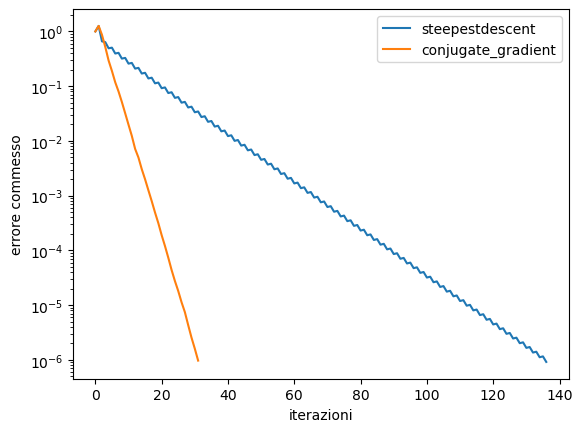

In [99]:
A1=A+np.eye(A.shape[0])*0.05
b1 = np.full(fill_value=1,shape=A1.shape[0]).reshape(A1.shape[0],1)
checkCondition(A1)
checkIfDescentIsPossible(A1)
x,vet_r,vec_sol,it = steepestdescent(A1,b1,x0,itmax,tol)
x2,vet_r2,vec_sol2,it2 = conjugate_gradient(A1,b1,x0,itmax,tol)
plt.semilogy(range(it),vet_r,range(it2),vet_r2)
plt.xlabel("iterazioni")
plt.ylabel("errore commesso")
plt.legend(["steepestdescent","conjugate_gradient"])
plt.show()

Noto che, dato che ora la matrice A è ben condizionata, i due metodi convergono verso la corretta soluzione in un numero irrisorio di iterazioni rispetto a prima, tutto questo grazie al fatto che la matrice A è ben condizionata.

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

In [100]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

In [101]:
import scipy.linalg as splin
import SolveTriangular 
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G= np.dot(A.T,A)
    print(G)
    print(A.T)
     
    f= np.dot(A.T,G)
    
    L= splin.cholesky(G,lower=True)
    U=L.T
        
   
    z,flag= SolveTriangular.Lsolve(L,f)
    if flag==0 :
        x,flag=SolveTriangular.Usolve(U,f)
    
    return x

def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=splin.qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [102]:
x =np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0]) 

y =np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59]) 

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

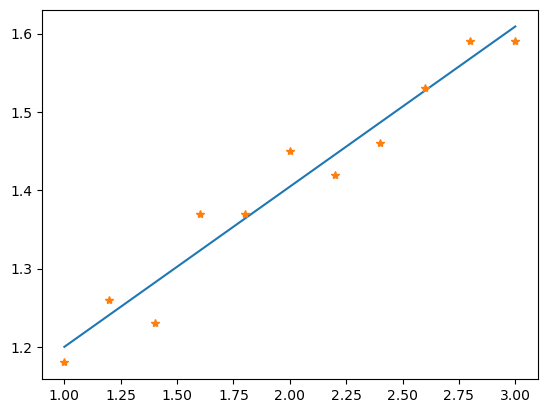

matrice ben condizionata
condizionamento => 8.419376e+00


In [103]:
xx=np.linspace(1,3,200).reshape(-1,)
n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A=np.vander(x,increasing=True)[:,:n1]
alphaQr,residuo=qrLS(A,y)

polQR = np.polyval(np.flip(alphaQr),xx)

plt.plot(xx,polQR)
plt.plot(x,y,"*")
plt.show()
checkCondition(A)

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

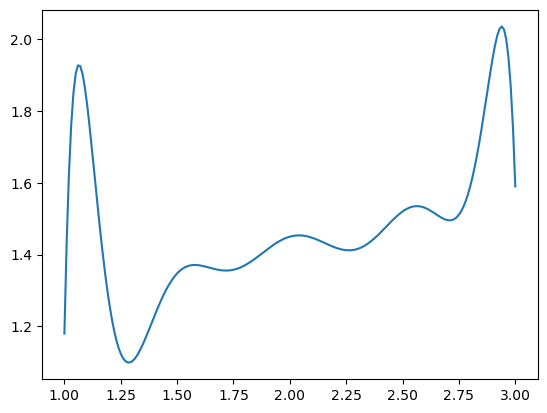

In [104]:


pol=InterpL(x,y,xx)

plt.plot(xx,pol)
plt.show()

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
[3.  3.4 3.8 4.2 4.6 5.  5.4 5.8 6.2 6.6 7. ]


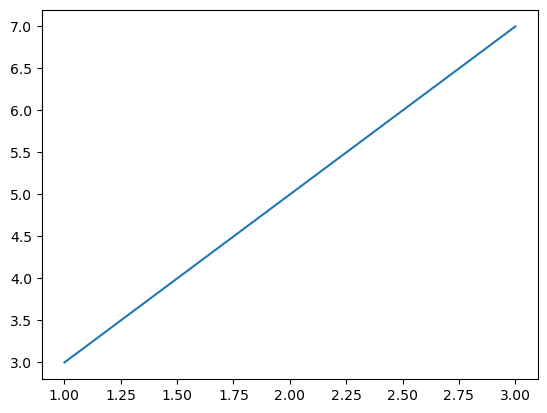

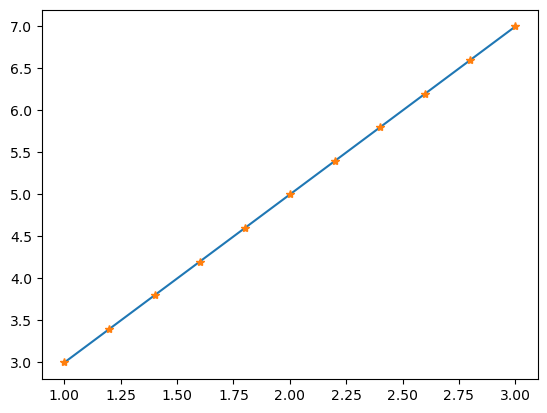

matrice ben condizionata
condizionamento => 8.419376e+00


In [105]:
x_cap=x[0:11]
y_cap=2*x_cap+1
print(x_cap)
print(y_cap)

xx_cap = np.linspace(1,3,200).reshape(-1,)
pol=InterpL(x_cap,y_cap,xx_cap)

plt.plot(xx_cap,pol)
plt.show()

n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A=np.vander(x_cap,increasing=True)[:,:n1]
alphaQr,residuo=qrLS(A,y_cap)

polQR = np.polyval(np.flip(alphaQr),xx_cap)

plt.plot(xx_cap,polQR)
plt.plot(x_cap,y_cap,"*")
plt.show()

checkCondition(A)

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

### Teorema dell’errore

$$
E(x)=f(x)-P_n(x)
$$

l’errore risulta nullo :

- quando la derivata n+1 è nulla
- oppure quando viene annullato il polinomio w(n+1) ⇒  cioè quando x_perturbato = x

In questo caso, dato che x non viene perturbato, ma è uguale a x_perturbato, omega è = 0, e quindi di conseguenza E(x) = 0.

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]


## 1 ##
Il Learning Rate(LR) è un parametro che, durante l'allenamento di una ANN rappresenta di quanto i pesi vengono aggiornati ogni iterazione, oppure ogni epoca in base al modello scelto.
Un LR troppo piccolo sta ad indicare che l'allenamento avrà una durata minore ed i pesi rischiano di superare il minimo target per il corretto funzionamento; mentre un LR troppo elevato provoca una lunga fase di addestramento ed i pesi rimangono "bloccati" in un minimo locale, senza quindi, raggiungere il target che viene rappresentato dal minimo globale.
Per cercare di sviare questo problema sono stati introdotti vari metodi per il calcolo di un LR adeguato in base alla fase di addestramento della ANN, uno di questi è il metodo del Gradient Descent con Momentum.

## 2 ##
l'algoritmo di backpropagation in una rete MLP con la struttura descritta segue questi passi principali:

Esegue il forward pass per calcolare le attivazioni e l'output.
Calcola l'errore dell'output e propaga l'errore indietro attraverso i layer nascosti.
Utilizza gli errori calcolati per determinare i gradienti della funzione di costo rispetto ai pesi e ai bias.
Aggiorna i pesi e i bias utilizzando un algoritmo di ottimizzazione come la discesa del gradiente.
Questo processo viene ripetuto iterativamente durante l'addestramento per minimizzare la funzione costo.

## 3 ##

Questi metodi vengono utilizzati per il calcolo della funzione costo dal metodo di Backpropagation:
1. Batch Gradient Descent => per trovare C viene utilizzato tutto il training set, quindi tutti i dati passano attraverso alla ANN (Forward Propagation) grazie alla quale si riesce a calcolare C, in seguito vengono aggioranti i pesi in base alla variazione di C rispetto ai parametri stessi, questa operazione viene eseguita una volta per Epoca.
2. Stochastic Gradient Descent => a differenza del Batch, in questo metodo viene introdotta solo un'osservazione(piccola unità del training set) nella rete, successivamente avvengono le stesse modalità del metodo Batch con la differenza sostanziale che per ogni osservazione vengono aggioranti i pesi:
mettiamo caso di avere n epoche e m osservazioni, posso calcolare quante volte i pesi vengono aggiornati con la formula n*m.
3. Mini Batch Gradient Descent => è una via di mezzo tra Stochastic e Batch, perchè il mini batch è un gruppo di osservazioni, quindi vengono introdotte 2 o più osservazioni alla volta nella rete.

# ripercussioni sulla funzione costo #
1. con il batch la funzione costo viene ridotta uniformemente
2. con lo stochastic la funzione viene ridotta in modo irregolare, per via delle numerose iterazioni, quindi può accadere che la rete apprenda anche del rumore
3. con il mini batch si ha un compromesso tra i due metodi sopra descritti, quindi la funzione costo viene ridotta in modo uniforme e con un tempo di calcolo minore rispetto al Batch.